In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = np.double(cv2.imread("test_img.pgm",0))

In [5]:
import numpy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):

    if random_state is None:
        random_state = numpy.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = numpy.meshgrid(numpy.arange(shape[0]), numpy.arange(shape[1]))
    indices = numpy.reshape(y+dy, (-1, 1)), numpy.reshape(x+dx, (-1, 1))

    return map_coordinates(image, indices, order=1).reshape(shape)

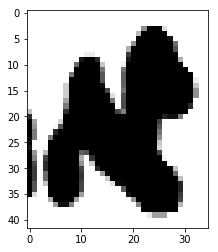

In [13]:
plt.imshow(img,cmap="gray")
plt.show()

In [14]:
img_morphed = elastic_transform(img, 0.5,2)

ValueError: operands could not be broadcast together with shapes (35,42) (42,35) 